In [1]:
pip install selfies


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
import selfies as sf
import numpy as np

In [4]:
## smiles string of the chemical molecules 
## these molecules are all derivates of benzene

input_smiles_list = ['Cc1ccccc1','c1ccc(cc1)O', 'c1ccc(cc1)N', 'C1=CC=C(C=C1)[N+](=O)[O-]', 'C(=O)(O)C1=CC=CC=C1',\
                    'C1=CC=C(C=O)C=C1', 'C=CC1=CC=CC=C1', 'CC(=O)C1=CC=CC=C1', 'CC(C)C1=CC=CC=C1', 'c1ccc2ccccc2c1',\
                    'c1ccc(cc1)c2ccccc2', 'Cc1ccccc1', 'C1=CC=C2C=C3C=CC=CC3=CC2=C1','c1ccccc1N', 'O=C(O)c1ccccc1C(O)=O',\
                    'O=C(O)c1ccc(O)cc1', 'C1=CC(=C(C=C1)O)O', 'Oc1ccc(O)cc1', 'Oc1ccc(O)cc1','C1=CC=CC=C1C(=O)OC(=O)C']

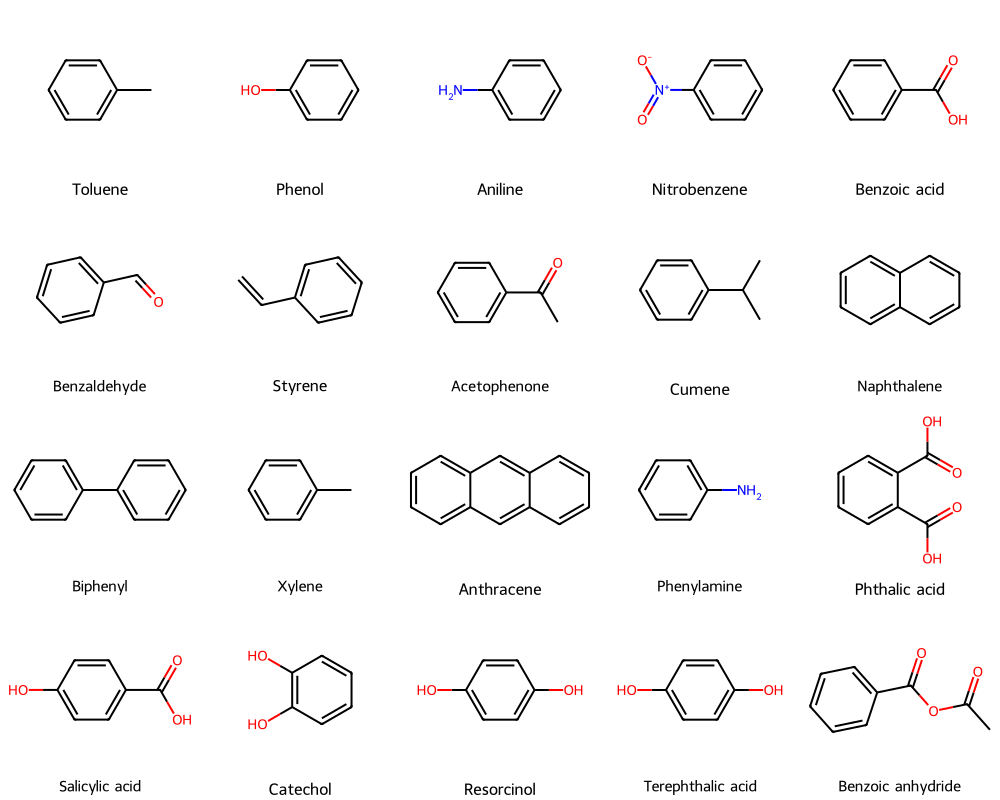

In [5]:
## Visualizing the molecules using RDkit

molecule_names =  ['Toluene','Phenol','Aniline','Nitrobenzene','Benzoic acid','Benzaldehyde','Styrene','Acetophenone','Cumene',\
          'Naphthalene','Biphenyl','Xylene','Anthracene','Phenylamine','Phthalic acid','Salicylic acid','Catechol',\
          'Resorcinol','Terephthalic acid','Benzoic anhydride']
input_mol_list = []
for smiles in input_smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    input_mol_list.append(mol)
img = Draw.MolsToGridImage(input_mol_list, molsPerRow=5, legends = [str(x) for x in molecule_names])
img

In [6]:
## Convert the smiles strings to selfies 

input_selfies_list = list(map(sf.encoder, input_smiles_list))
input_selfies_list

['[C][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][O]',
 '[C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][N]',
 '[C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][N+1][=Branch1][C][=O][O-1]',
 '[C][=Branch1][C][=O][Branch1][C][O][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][=C][C][=C][Branch1][Ring1][C][=O][C][=C][Ring1][Branch2]',
 '[C][=C][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][C][=Branch1][C][=O][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][C][Branch1][C][C][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][=C][C][=C][C][=C][C][=C][C][Ring1][=Branch1][=C][Ring1][#Branch2]',
 '[C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][C][=C][C][=C][C][=C][Ring1][=Branch1]',
 '[C][=C][C][=C][C][=C][C][=C][C][=C][C][Ring1][=Branch1][=C][C][Ring1][#Branch2][=C][Ring1][=C]',
 '[C][=C][C][=C][C][=C][Ring1][=Branch1][N]',
 '[O][=C][Branch1][C][O][C][=C][C][=C][C][=C][Ring1

In [7]:
## Find out the maximum length in the list

max_len = max(sf.len_selfies(s) for s in input_selfies_list)
max_len

20

In [8]:
## Identify the unique SELFIES symbols (alphabets)
alphabet = sf.get_alphabet_from_selfies(input_selfies_list)

## add [nop] to the symbols (alphabet)
alphabet.add("[nop]")

## convert the tuple to list and sort
alphabet= list(sorted(alphabet))
alphabet

['[#Branch1]',
 '[#Branch2]',
 '[=Branch1]',
 '[=Branch2]',
 '[=C]',
 '[=O]',
 '[Branch1]',
 '[Branch2]',
 '[C]',
 '[N+1]',
 '[N]',
 '[O-1]',
 '[O]',
 '[Ring1]',
 '[nop]']

In [9]:
### Map the SELFIES symbols to indices

vocab_stoi = {symbol: idx for idx, symbol in enumerate(alphabet)}
vocab_stoi

{'[#Branch1]': 0,
 '[#Branch2]': 1,
 '[=Branch1]': 2,
 '[=Branch2]': 3,
 '[=C]': 4,
 '[=O]': 5,
 '[Branch1]': 6,
 '[Branch2]': 7,
 '[C]': 8,
 '[N+1]': 9,
 '[N]': 10,
 '[O-1]': 11,
 '[O]': 12,
 '[Ring1]': 13,
 '[nop]': 14}

In [10]:
vocab_stoi

{'[#Branch1]': 0,
 '[#Branch2]': 1,
 '[=Branch1]': 2,
 '[=Branch2]': 3,
 '[=C]': 4,
 '[=O]': 5,
 '[Branch1]': 6,
 '[Branch2]': 7,
 '[C]': 8,
 '[N+1]': 9,
 '[N]': 10,
 '[O-1]': 11,
 '[O]': 12,
 '[Ring1]': 13,
 '[nop]': 14}

In [11]:
vocab_itos = {idx: symbol for symbol, idx in vocab_stoi.items()}
vocab_itos

{0: '[#Branch1]',
 1: '[#Branch2]',
 2: '[=Branch1]',
 3: '[=Branch2]',
 4: '[=C]',
 5: '[=O]',
 6: '[Branch1]',
 7: '[Branch2]',
 8: '[C]',
 9: '[N+1]',
 10: '[N]',
 11: '[O-1]',
 12: '[O]',
 13: '[Ring1]',
 14: '[nop]'}

In [12]:
max_len

20

In [13]:
## Use one-hot encoding to encode the SELFIES indices

label, one_hot = sf.selfies_to_encoding(input_selfies_list[0], vocab_stoi, pad_to_len=max_len)
input_one_hot_arr = np.expand_dims(np.array(one_hot), axis=0)


for i in range (1,len(input_selfies_list)):
    label, one_hot = sf.selfies_to_encoding(input_selfies_list[i], vocab_stoi, pad_to_len=max_len)
    one_hot_arr = np.expand_dims(np.array(one_hot), axis=0)
    input_one_hot_arr = np.vstack((input_one_hot_arr,one_hot_arr))
    
input_one_hot_arr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       ...,

       [[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
## The input_one_hot_arr is the encoded dataset to be trained
## It contains 20 molecules, each represented in a 2D array of size 20 x 15. 

train_dataset = input_one_hot_arr


train_dataset.shape

(20, 20, 15)

In [15]:
train_dataset[0].shape

(20, 15)

In [16]:
train_dataset[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0,

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


In [18]:
cuda = True
device = torch.device("cuda" if cuda else "cpu")

In [19]:
device

device(type='cuda')

In [20]:
from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, data):
        self.x =  torch.from_numpy(data).to(device)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index]
    def __len__(self):
        return self.len

In [21]:
data_set=DataBuilder(train_dataset)
train_loader=DataLoader(dataset=data_set, batch_size=8)

In [22]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()

        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.input_dim = input_dim

        # Encoder
        self.encoder_gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc_mean = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        # Decoder
        self.decoder_gru = nn.GRU(latent_dim, hidden_dim,batch_first=True)
        self.fc_output = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        _, hidden = self.encoder_gru(x)
        hidden = hidden.squeeze(0)
        mean = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mean + eps * std
        return z

    def decode(self, z, seq_len):
      batch_size = z.size(0)
      hidden = torch.zeros(1, batch_size, self.hidden_dim).to(z.device)
      output_seq = []

      # Generate the sequence one step at a time
      for _ in range(seq_len):
          output, hidden = self.decoder_gru(z.unsqueeze(1), hidden)
          output = self.fc_output(output.squeeze(1))
          output_seq.append(output)

      # Concatenate the sequence outputs along the time dimension
      output_seq = torch.stack(output_seq, dim=1)
      return output_seq



    def forward(self, x, seq_len):
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        output = self.decode(z, seq_len)
        return output, mean, logvar

    def loss_function(self, output, x, mean, logvar):
        reconstruction_loss = F.cross_entropy(output, x)
        kl_loss = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
        return reconstruction_loss + kl_loss


Epoch [1/100], Loss: 5.3524
Epoch [2/100], Loss: 5.1159
Epoch [3/100], Loss: 4.9111
Epoch [4/100], Loss: 4.7459
Epoch [5/100], Loss: 4.6056
Epoch [6/100], Loss: 4.4848
Epoch [7/100], Loss: 4.3900
Epoch [8/100], Loss: 4.3073
Epoch [9/100], Loss: 4.2407
Epoch [10/100], Loss: 4.1856
Epoch [11/100], Loss: 4.1396
Epoch [12/100], Loss: 4.1010
Epoch [13/100], Loss: 4.0720
Epoch [14/100], Loss: 4.0479
Epoch [15/100], Loss: 4.0298
Epoch [16/100], Loss: 4.0175
Epoch [17/100], Loss: 4.0053
Epoch [18/100], Loss: 3.9908
Epoch [19/100], Loss: 3.9838
Epoch [20/100], Loss: 3.9775
Epoch [21/100], Loss: 3.9761
Epoch [22/100], Loss: 3.9723
Epoch [23/100], Loss: 3.9605
Epoch [24/100], Loss: 3.9566
Epoch [25/100], Loss: 3.9557
Epoch [26/100], Loss: 3.9466
Epoch [27/100], Loss: 3.9369
Epoch [28/100], Loss: 3.9297
Epoch [29/100], Loss: 3.9093
Epoch [30/100], Loss: 3.9060
Epoch [31/100], Loss: 3.8927
Epoch [32/100], Loss: 3.8738
Epoch [33/100], Loss: 3.8601
Epoch [34/100], Loss: 3.8474
Epoch [35/100], Loss: 3

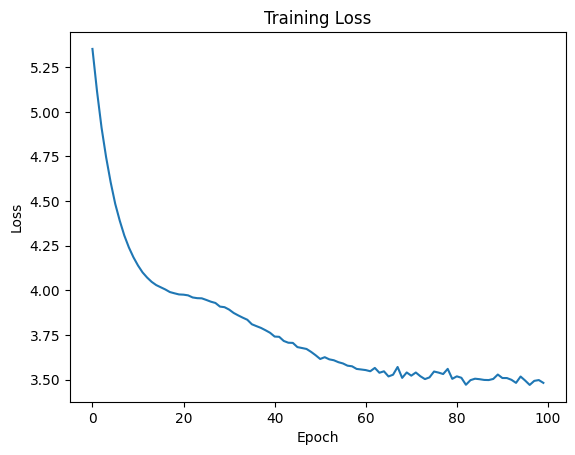

In [23]:
# Define the training function
def train_vae(vae, train_loader, num_epochs):
    optimizer = optim.Adam(vae.parameters(), lr=0.001)

    losses = []

    # Training loop
    for epoch in range(num_epochs):
        vae.train()
        total_loss = 0
        num_batches = 0

        # Mini-batch training
        for batch in train_loader:
            batch = batch.to(device)
            batch = batch.float()

            optimizer.zero_grad()
            output, mean, logvar = vae(batch, seq_len=batch.size(1))
            loss = vae.loss_function(output, batch, mean, logvar)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            num_batches += 1

        # Print average loss for the epoch
        average_loss = total_loss / num_batches
        losses.append(average_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}")

    # Plot the loss values
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

# Example usage
input_dim = train_dataset.shape[-1]
hidden_dim = 16
latent_dim = 8
num_epochs = 100

# Create an instance of the VAE model
vae = VAE(input_dim, hidden_dim, latent_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae.to(device)

# Train the VAE
train_vae(vae, train_loader, num_epochs)


In [24]:
def predict_sequence(vae, input_sequence):
    vae.eval()
    with torch.no_grad():
        input_sequence = input_sequence.unsqueeze(0).float().to(device)
        mean, logvar = vae.encode(input_sequence)
        z = vae.reparameterize(mean, logvar)
        output_sequence = vae.decode(z, seq_len=input_sequence.size(1))

    predicted_sequence = torch.argmax(output_sequence, dim=2)
    one_hot_sequence = torch.eye(output_sequence.size(-1), device=device)[predicted_sequence]

    return one_hot_sequence.squeeze(0)

In [25]:
test_data = torch.from_numpy(train_dataset[0])
output = predict_sequence(vae, test_data)

In [26]:
output.shape

torch.Size([20, 15])

In [27]:
output

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0.,